In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# XEB

In [26]:
dir = "<replace/with/your/own/file/directory>"
M = 144 
cov = np.load(dir + "cov.npy")
probs_ideal = np.load(dir + "tot_probs.npy")

probs_MPS = [] 
probs_exp = [] 
d = 4
chi = 1000 

N_array = range(5, 14)
for N in N_array:
    probs_MPS.append(np.load(f"<replace_with_torontonian_result_for_MPS>_{N}.npy"))  # needs to be precomputed by the Julia code
    probs_exp.append(np.load(f"replace_with_torontonian_result_for_experiment>_{N}.npy")) 

In [76]:
scores = [] 
for N in N_array:
    prob_exp = probs_exp[N - N_array[0]] 
    score_exp = np.average(np.log(prob_exp / (probs_ideal[N] / comb(M, N)))) 
    
    prob_MPS = probs_MPS[N - N_array[0]] 
    score_MPS = np.average(np.log(prob_MPS / (probs_ideal[N] / comb(M, N)))) 
    
    scores.append([score_exp, score_MPS]) 
    print(score_exp, score_MPS)
    
scores = np.array(scores)

0.20735449649522367 0.215143848203839
0.32381302671969286 0.33560072557474774
nan 0.44746077607883433
0.5296913298231263 0.5422212987728285
0.6327517422395936 0.6495393002899283
0.7177051842367896 0.736037954210058
0.8104357399584137 0.8155745362941723
0.8922031536153089 0.9144263787410639
0.9829599514643212 0.9543446361724358
1.038728463203193 1.054800341338374
1.1395344233389337 1.1141993757781914
1.1745754620222717 1.1760147700741033
1.2707872428729603 1.2011586082738892


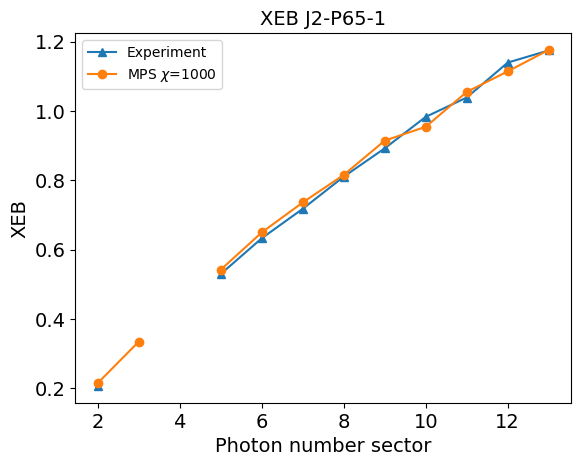

In [64]:
plt.plot(N_array, scores[:, 0], '-^', label = "Experiment")
plt.plot(N_array, scores[:, 1], '-o', label = "MPS $\chi$=1000")
plt.xlabel("Photon number sector", fontsize = 14)
plt.ylabel("XEB", fontsize = 14)
plt.title("XEB J2-P65-1", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 10)